In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=13)
MDP of size 454 / 4 / 1722 / 3.8

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=13, maximum_size=0, force_consider_own=True)
MDP of size 150717 / 3 / 768720 / 5.1


,alpha,gamma,horizon,value_eps,model,vi_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
0,0.00,1.0,100,0.01,their,14,0.013905,0.000000,1,1,0.000988,0.000000,0,0.000253
1,0.00,1.0,100,0.01,our,14,5.838341,0.000000,6,6,0.000888,0.000000,2,0.003485
2,0.40,0.0,50,0.01,their,313,0.311744,23.365978,208,208,0.002672,0.480608,2,0.081349
3,0.40,0.0,50,0.01,our,362,142.453315,23.045052,787,787,0.044704,0.480063,2,0.273225
4,0.10,1.0,100,0.01,their,351,0.347700,9.037160,261,261,0.003821,0.111111,2,0.104447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.05,1.0,50,0.01,our,100,39.880133,1.632705,952,952,0.069259,0.052632,2,0.377708
176,0.45,1.0,200,0.01,their,1609,1.644087,154.688350,226,226,0.002702,0.801706,2,0.085985
177,0.45,1.0,200,0.01,our,1868,712.916166,153.765795,501,501,0.014040,0.802163,2,0.185468
178,0.25,0.0,100,0.01,their,545,0.587676,23.381773,4,4,0.000530,0.250000,2,0.001953


In [3]:
data[(data.ss_n - data.ss_nonzero) != 0]

,alpha,gamma,horizon,value_eps,model,vi_iter,vi_time,vi_start_value,ss_n,ss_nonzero,ss_time,rpp,rpp_iter,rpp_time
13,0.2,0.5,200,0.01,our,1198,472.252805,38.003532,10,9,0.000538,0.2,2,0.004243
45,0.2,0.0,200,0.01,our,1198,473.715940,38.003532,10,9,0.000602,0.2,2,0.004075
49,0.2,0.5,100,0.01,our,600,236.745178,19.009275,10,9,0.000554,0.2,2,0.003982
53,0.2,0.5,50,0.01,our,300,120.205657,9.507183,10,9,0.000566,0.2,2,0.004007
83,0.2,0.0,50,0.01,our,300,119.373013,9.507183,10,9,0.000531,0.2,2,0.003937
115,0.2,0.0,100,0.01,our,600,239.620642,19.009275,10,9,0.000552,0.2,2,0.004018


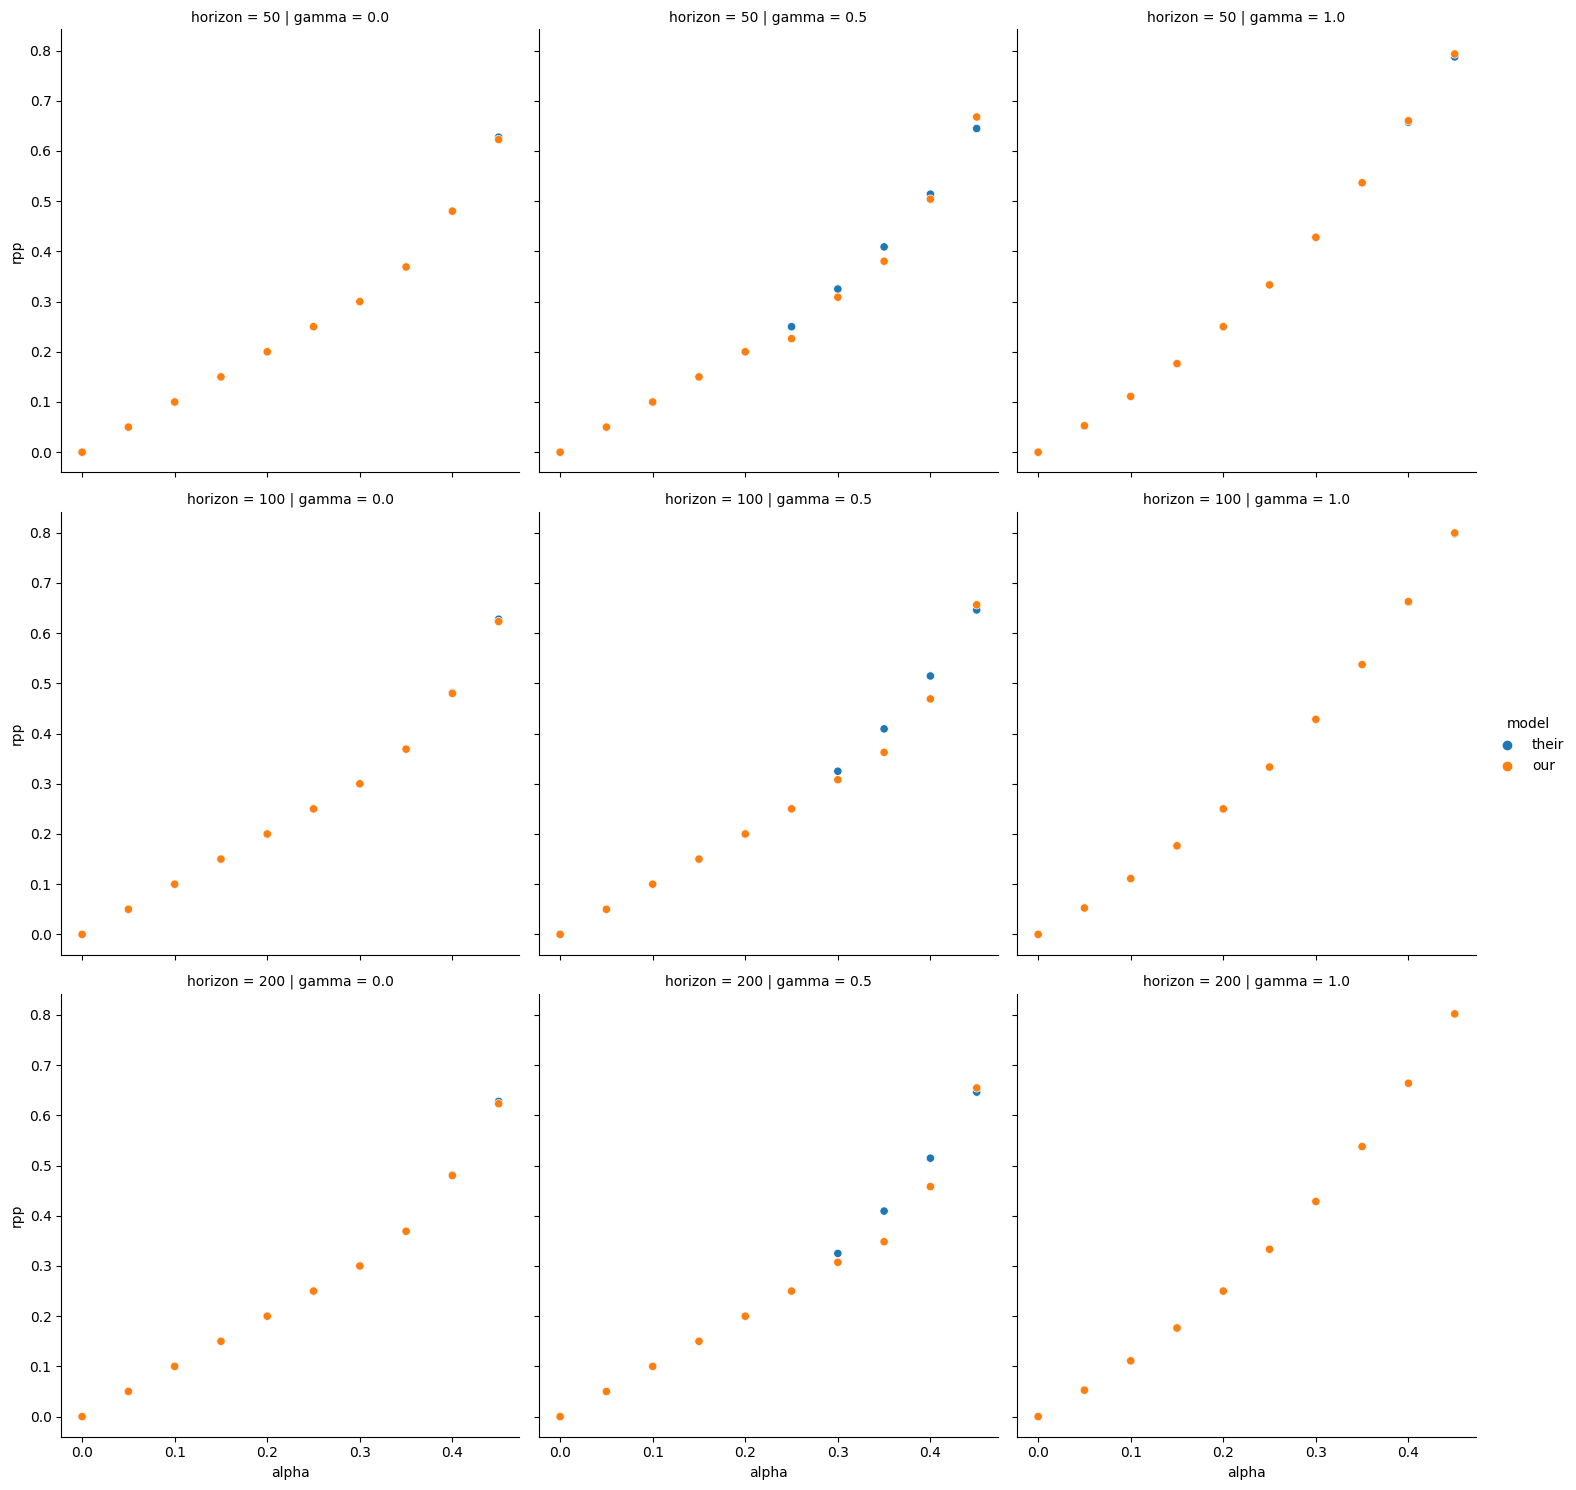

In [4]:
# Compare model w.r.t. reward
sns.relplot(
    data,
    x="alpha",
    y="rpp",
    col="gamma",
    row="horizon",
    hue="model",
)

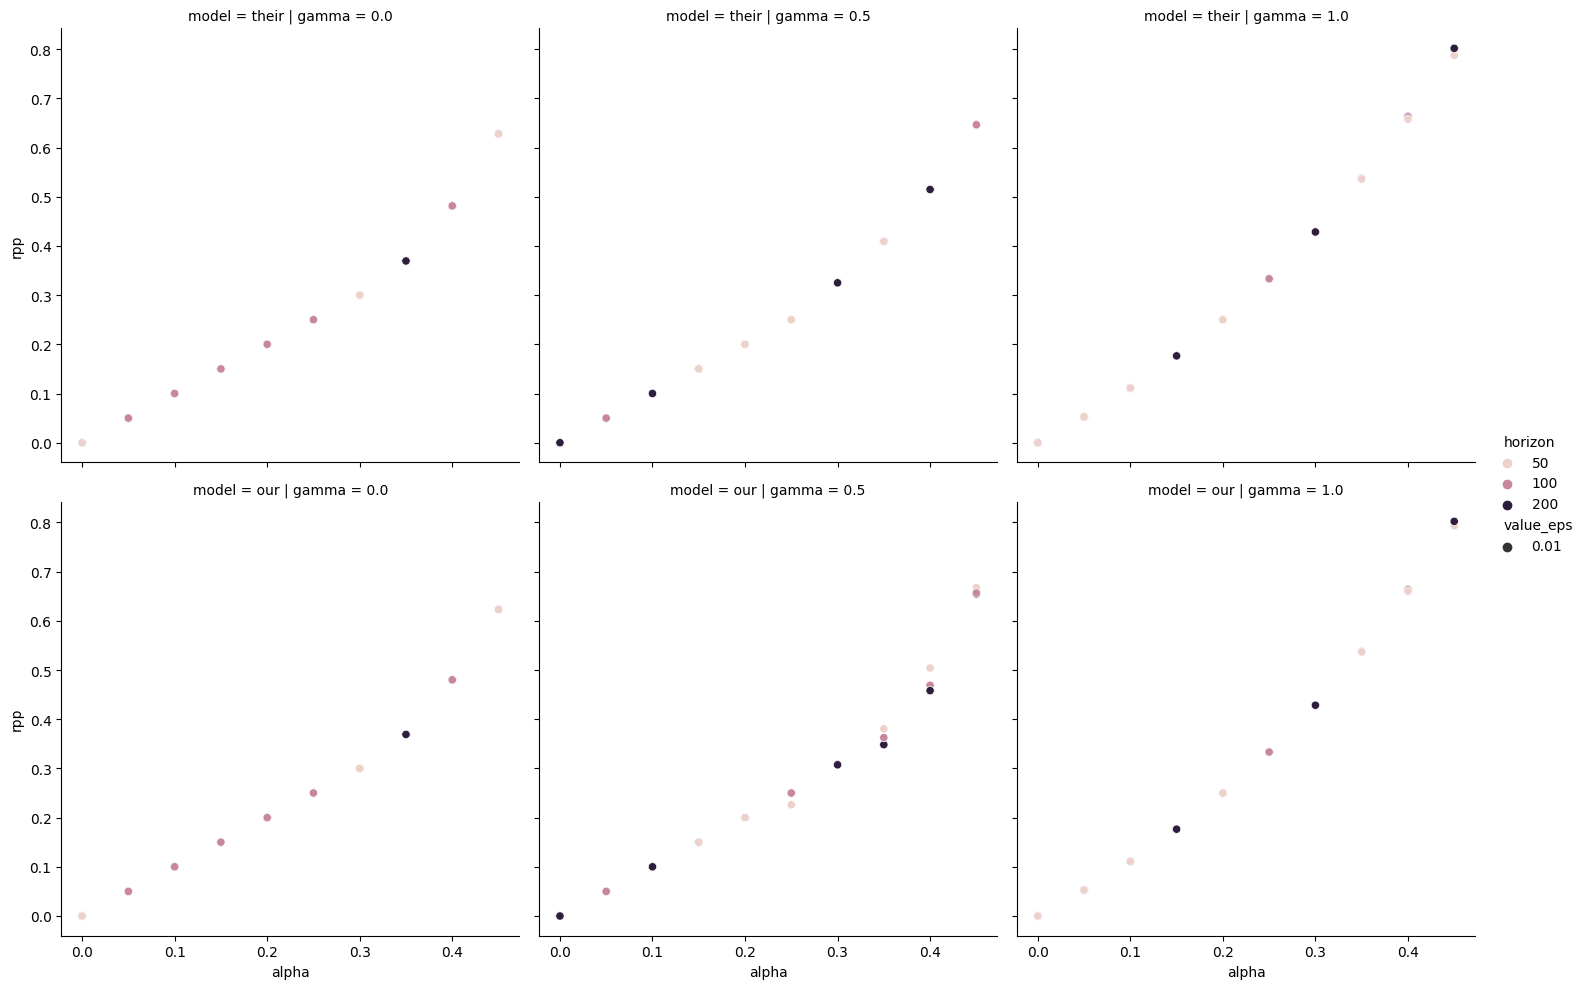

In [5]:
# Demonstrate effect of horizon
sns.relplot(
    data,
    x="alpha",
    y="rpp",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

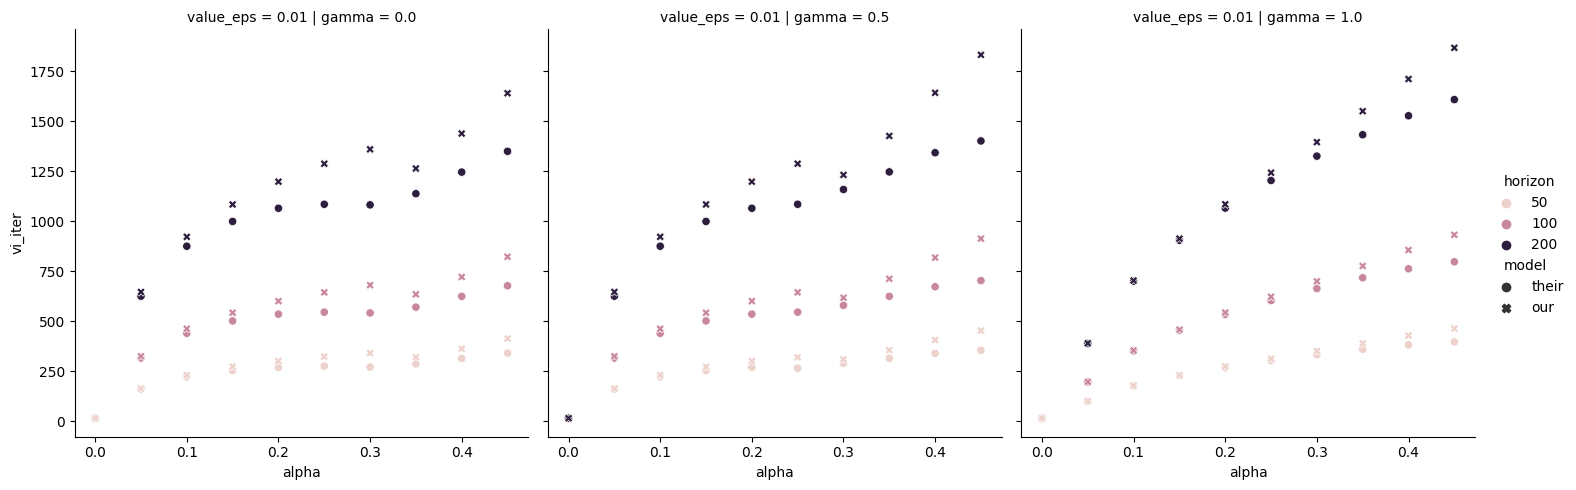

In [6]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="vi_iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

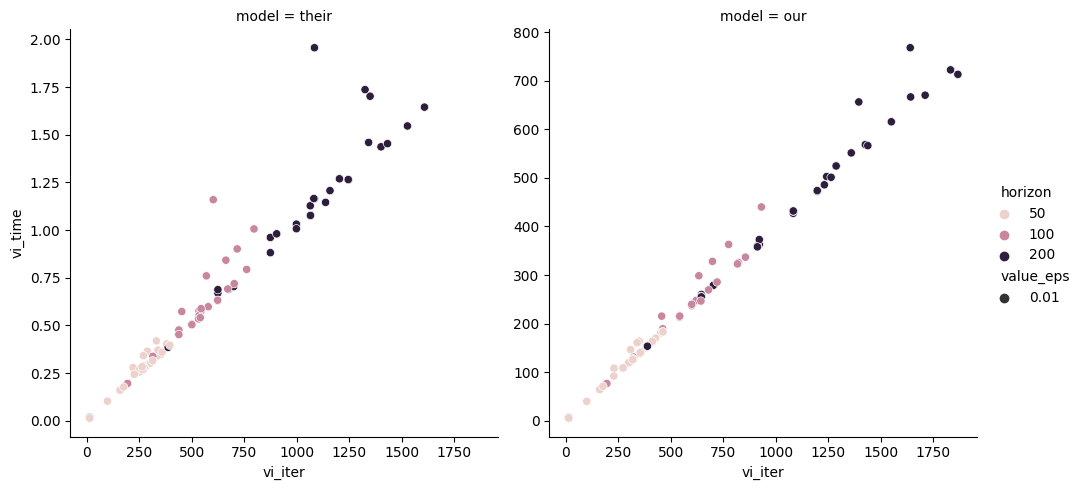

In [7]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="vi_iter",
    y="vi_time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)

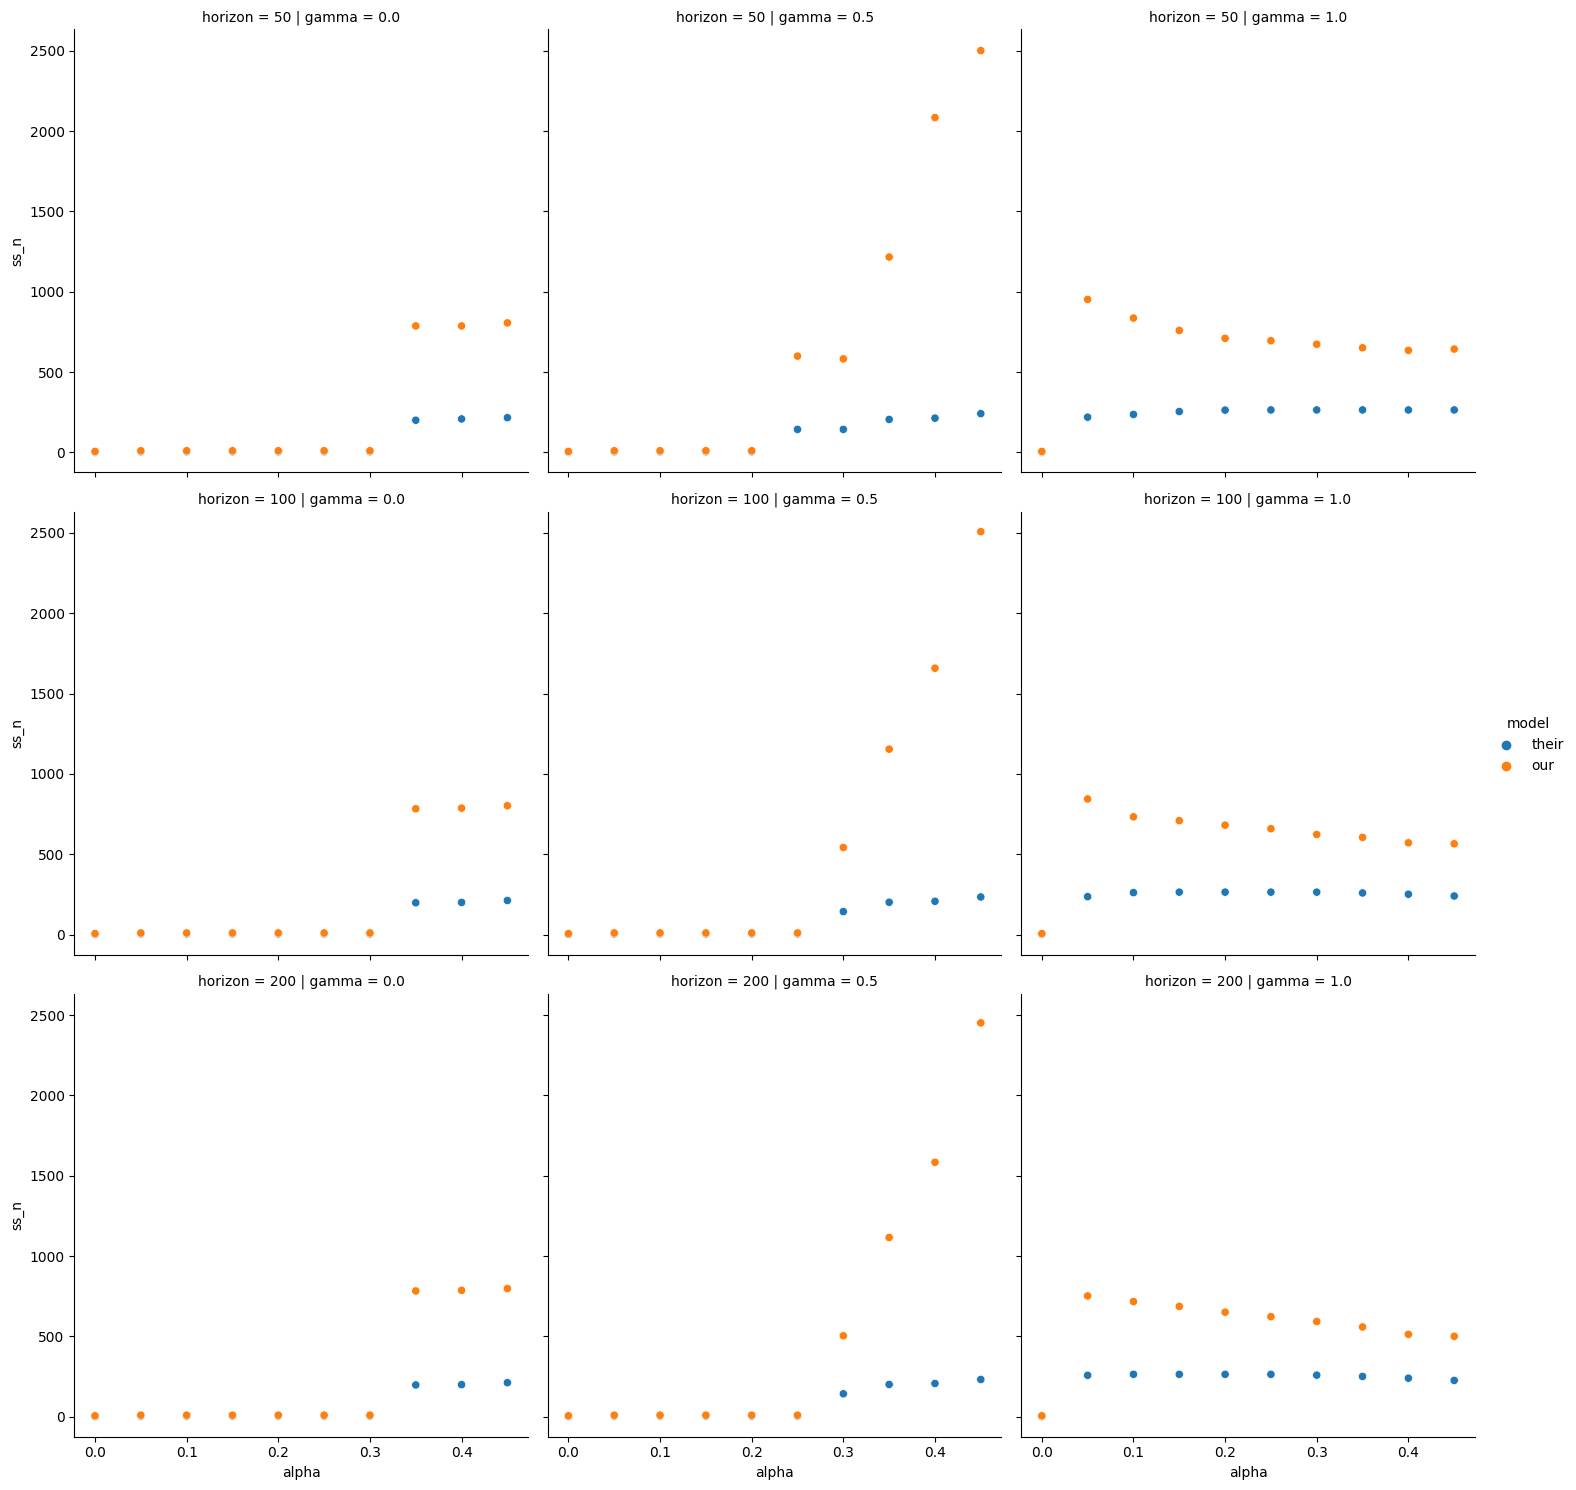

In [8]:
# Size of policy / steady state
sns.relplot(
    data,
    x="alpha",
    y="ss_n",
    col="gamma",
    row="horizon",
    hue="model",
)